# Exercício 1 - Grau e transitividade

Importar bibliotecas.

In [4]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Ler grafo de arquivo com listas de arestas.

In [5]:
G= nx.read_edgelist("data/data/lesmis.txt", nodetype=int, data=(('weight',float),))
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

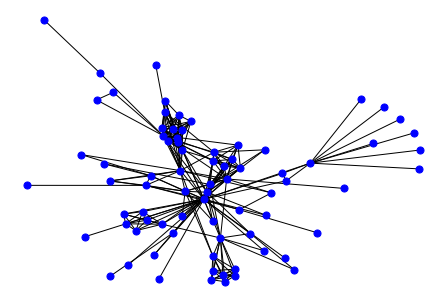

In [6]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Rede não direcionada.

In [7]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

Analisar maior componente.

In [8]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

Indexar nós.

In [9]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Número de nós e arestas.

In [10]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


## Medidas relacionadas a grau

Lista dos graus de todos os vértices da rede.

In [11]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree:', vk)

Degree: [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


Grau médio:

In [12]:
md = mean(vk)
print('Mean degree: ', md)

Mean degree:  6.597402597402597


Cálculo da distribuição de grau.

In [14]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk


In [15]:
ks, Pk = degree_distribution(G)

Gráfico da distribuição de grau em escala log x log.

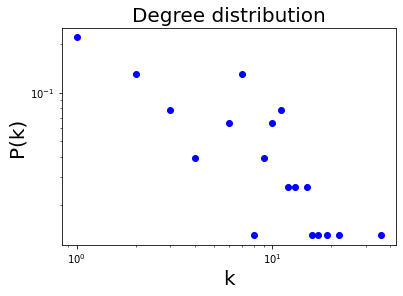

In [16]:
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

Cálculo de momento da distribuição de grau.

In [18]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

Primeiro momento estatístico (grau médio).

In [19]:
k1 = momment_of_degree_distribution(G,1)
print("Mean degree = ", mean(vk))
print("First moment of the degree distribution = ", k1)

Mean degree =  6.597402597402597
First moment of the degree distribution =  6.5974025974025965


Segundo momento estatístico

In [22]:
k2 = momment_of_degree_distribution(G,2)
print("Second moment of the degree distribution = ", k2)

Second moment of the degree distribution =  79.53246753246754


Variância.

In [24]:
variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variance of the degree = ", variance)

Variance of the degree =  36.00674650025301


Coeficiente de complexidade.

In [49]:
def complexitiy_coefficient(G):
    return momment_of_degree_distribution(G, 2)/momment_of_degree_distribution(G, 1)

In [51]:
print("Coeficiente de complexidade da rede: ", complexitiy_coefficient(G))

Coeficiente de complexidade da rede:  12.055118110236222


Entropia de Shannon.

In [25]:
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

In [26]:
H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.5957


Entropia de Shannon normalizada.

In [27]:
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [28]:
H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

Normalized Shannon Entropy =  0.5738


## Transitividade e aglomeração

Transitividade da rede (número de triângulos).

In [29]:
CC = (nx.transitivity(G)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.4989


Coeficiente de aglormeação médio (também calcula número de triângulos).

In [31]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

Average clustering: 0.5731


Aglomeração de cada nó.

In [32]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

Clustering of all nodes: [0.         0.06666667 1.         1.         0.         0.
 0.         0.         0.         0.         0.12063492 0.
 1.         0.         0.         0.         0.31428571 0.49090909
 0.40833333 0.38181818 0.32352941 0.33333333 0.64285714 0.66666667
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         0.35497835 0.47619048 0.42857143
 0.33333333 0.60952381 0.76923077 0.8        0.8        0.71111111
 0.83333333 1.         1.         0.61111111 1.         1.
 1.         1.         1.         1.         0.45454545 1.
 0.         0.33333333 0.         0.9047619  1.         0.
 0.         0.69090909 0.75641026 0.         0.         0.92727273
 1.         0.92727273 0.86363636 0.86363636 0.93333333 1.
 1.         1.         1.         0.         0.        ]


Distribuição de coeficiente de aglormeração.

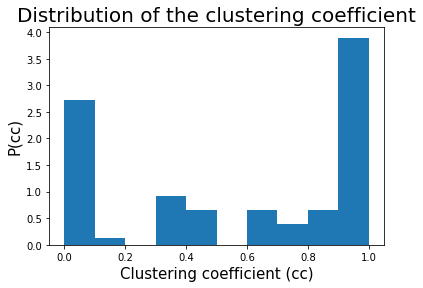

In [33]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

Coeficiente de aglomeração em função do grau (tendência exponencial negativa).

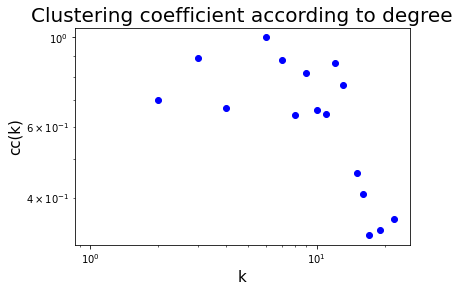

In [44]:
#Average clustering for each degree k
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0):
        cm = mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)

In [48]:
mean(vcc[vk == 3])

0.8888888888888888